In [1]:
import pandas as pd
import torch
import random
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("../Data/hindi_train.csv")
test = pd.read_csv("../Data/HindiNews_test.csv")
train.head()

,Id,Heading,Summary,Article
0,hindi_2023_train_0,"गला दबाकर हत्या की; बॉडी बोरे में भरी, लोकल मा...",Kerala Minor Girl Rape Case - केरल के एर्नाकुल...,केरल के एर्नाकुलम जिले में 5 साल की बच्ची से र...
1,hindi_2023_train_1,तेलंगाना में 18 की जान गई; जम्मू-कश्मीर में बा...,इस साल मानसून सीजन में कई राज्यों में भारी तबा...,मानसून सीजन में हुई भारी बारिश ने कई राज्यों म...
2,hindi_2023_train_2,"राजस्थान सरकार बनाएगी कर्ज राहत आयोग, कोर्ट के...",चुनावी साल में राजस्थान सरकार किसानों को लुभान...,चुनावी साल में राजस्थान सरकार किसानों को लुभान...
3,hindi_2023_train_3,"3 से 7 अगस्त तक कर सकेंगे अप्लाय, प्राइस बैंड ...",Non-banking lender SBFC Finance's initial publ...,नॉन बैंकिग फाइनेंस कंपनी 'SBFC फाइनेंस लिमिटेड...
4,hindi_2023_train_4,"डाइनिंग टेबल पर कुकर-कड़ाही न सजाएं, चीन के खा...",स्वाद खाने की बुनियाद है। लेकिन अगर खाना सुंदर...,स्वाद खाने की बुनियाद है। लेकिन अगर खाना सुंदर...


In [3]:
print(train.head(1)["Heading"])

0    गला दबाकर हत्या की; बॉडी बोरे में भरी, लोकल मा...
Name: Heading, dtype: object


In [4]:
train.shape

(21225, 4)

In [5]:
test = pd.read_csv("../Data/HindiNews_test.csv")
test.shape

(3000, 3)

In [6]:
test.head(5)

,id,Article,Heading
0,HindiNews_test_0,‘वारिस पंजाब दे’ संगठन के चीफ अमृतपाल सिंह को ...,भिंडरांवाले के गांव में वारिस पंजाब दे का चीफ ...
1,HindiNews_test_1,कांग्रेस नेता राहुल गांधी जल्द ही साउथ दिल्ली ...,सांसदी जाने के बाद अप्रैल में सरकारी बंगला छोड़...
2,HindiNews_test_2,संसद परिसर में मंगलवार को आम आदमी पार्टी (AAP)...,"BJP का तंज- झूठ बोले कौआ काटे, राघव का पलटवार-..."
3,HindiNews_test_3,राष्ट्रीय लोकतांत्रिक पार्टी (RLP) के प्रमुख औ...,"हनुमान बेनीवाल बोले- कांग्रेस छोड़ दें सचिन, ह..."
4,HindiNews_test_4,मैं कश्मीर से हूं। बचपन में मुझे बताया गया कि ...,कोई मारपीट से सुधारना चाहता तो कोई समझता मनोरो...


In [7]:
test["Heading"][25]

'दुधवा नेशनल पार्क में हाथियों के झुंड के सामने सेल्फी ले रहे थे, जान बचाकर भागे'

In [8]:
import re
def preprocess_tokenize(text):
      # for removing punctuation from sentencesc
    text = str(text)
    # text = re.sub(r'(\d+)', r'', text) # remove numbers
    
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\t', ' ')
    text = text.replace('\u200d', '') #
    text=re.sub("(__+)", ' ', str(text)).lower()   #remove _ if it occors more than one time consecutively
    text=re.sub("(--+)", ' ', str(text)).lower()   #remove - if it occors more than one time consecutively
    text=re.sub("(~~+)", ' ', str(text)).lower()   #remove ~ if it occors more than one time consecutively
    text=re.sub("(\+\++)", ' ', str(text)).lower()   #remove + if it occors more than one time consecutively
    text=re.sub("(\.\.+)", ' ', str(text)).lower()   #remove . if it occors more than one time consecutively
    text=re.sub(r"[&©@#ø;.~*!]", ' ', str(text)).lower() #remove <>()|&©ø"',;?~*!
    # text = re.sub(r"[‘’।:]", " ", str(text)) #removing other special characters
    # text = re.sub("([a-zA-Z])",' ',str(text)).lower() #removing all the single characters
    text = re.sub("(\s+)",' ',str(text)).lower() #removing extra spaces
    return text

In [9]:
train_data_src = train['Article']
train_data_trg = train['Summary']

In [10]:
tokenized_corpus_trg = [preprocess_tokenize(x) for x in train_data_trg]  #these are Summaries
tokenized_corpus_src = [preprocess_tokenize(x) for x in train_data_src]  #these are articles
tokenized_corpus_src_test = [preprocess_tokenize(x) for x in test['Article']]  #these are articles

In [11]:
tokenized_corpus_src[:10]

['केरल के एर्नाकुलम जिले में 5 साल की बच्ची से रेप के बाद गला दबाकर हत्या कर दी गई। आरोपी ने बच्ची का शव बोरे में डालकर डंपिंग ग्राउंड में फेंक दिया था। पुलिस ने आरोपी शख्स को गिरफ्तार कर लिया है। घटना शुक्रवार शाम की है। पुलिस ने शनिवार को मीडिया को इसकी जानकारी दी। cctv फुटेज में बच्ची के साथ नजर आया आरोपी एर्नाकुलम sp विवेक कुमार ने बताया- बच्ची शुक्रवार शाम को किडनैप हुई थी। हमारी टीम ने cctv फुटेज चेक किए जिसमें बच्ची को आरोपी के साथ देखा गया। उसी दिन रात 9 30 बजे आरोपी को गिरफ्तार कर लिया गया। उस समय वह नशे की हालत में था और बच्ची उसके साथ नहीं थी। स्थानीय लोगों ने बच्ची को मार्केट के पास आरोपी के साथ देखा था। उन्होंने पुलिस को इसकी जानकारी दी। पुलिस ने पूरे एरिया में सर्चिंग की तो मार्केट के पीछे बच्ची की लाश मिली। इस इलाके में लोग कूड़ा फेंकते थे और कई असामाजिक लोग यहां नशा करने आते थे। बच्ची की बिल्डिंग में ही रहता था आरोपी पुलिस ने बताया- आरोपी शख्स बिहार का रहने वाला है और केरल में मजदूरी करता है। बच्ची के माता-पिता भी बिहार के हैं और मजदूरी करते हैं। जिस इमारत में बच्ची रहत

In [12]:
tokenized_corpus_trg[:10] 

['kerala minor girl rape case - केरल के एर्नाकुलम जिले में 5 साल की बच्ची से रेप के बाद गला दबाकर हत्या कर दी गई। आरोपी ने बच्ची का शव बोरे में डालकर डंपिंग ग्राउंड में फेंक दिया',
 'इस साल मानसून सीजन में कई राज्यों में भारी तबाही मची है। हिमाचल प्रदेश में अब तक 187 लोगों की जान जा चुकी है। वहीं तेलंगाना में एक हफ्ते में 18 लोगों की मौत हो गई। तेलंगाना में करीब 12,000 लोगों को राहत शिविरों में bihar up monsoon rainfall update rajasthan indore bhopal | chhattisgarh, west bengal weather forecast',
 'चुनावी साल में राजस्थान सरकार किसानों को लुभाने के लिए बिल लेकर आ रही है। किसान कर्ज राहत आयोग बिल को दो अगस्त को विधानसभा में पेश करके पारित करवाने की तैयारी है। यह बिल पारित होने के बाद किसान कर्जमाफी आयोग बनाने का रास्ता gehlot government will form farmers loan waiver commission',
 "non-banking lender sbfc finance's initial public offering (ipo) finance ipo details | everything you need to know नॉन बैंकिग फाइनेंस कंपनी 'sbfc फाइनेंस लिमिटेड' का ipo पब्लिक सब्सक्रिप्शन के लिए अगले हफ्ते ओप

In [13]:
len(tokenized_corpus_src), len(tokenized_corpus_trg), len(tokenized_corpus_src_test)

(21225, 21225, 3000)

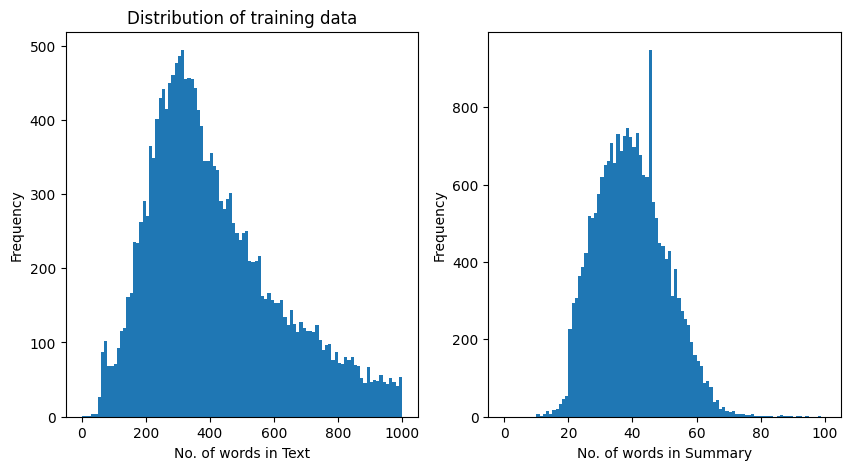

In [14]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in tokenized_corpus_src[:train.shape[0]]:
      text_word_count.append(len(i.split()))

for i in tokenized_corpus_trg[:train.shape[0]]:
      summary_word_count.append(len(i.split()))

fig , ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
ax[0].hist(text_word_count, bins=100, range=[0, 1000])
ax[1].hist(summary_word_count, bins=100, range=[0, 100])
ax[0].set_xlabel("No. of words in Text")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("No. of words in Summary")
ax[1].set_ylabel("Frequency")
ax[0].set_title('Distribution of training data')
plt.show()

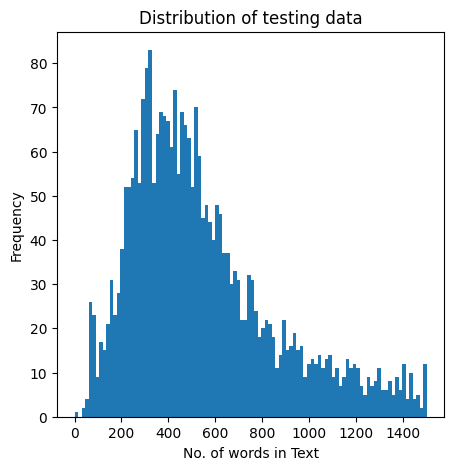

In [15]:
import matplotlib.pyplot as plt

text_word_count = []

for i in range(len(test)):
      text_word_count.append(len(test['Article'][i].split()))

fig , ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
ax.hist(text_word_count, bins=100, range=[0, 1500])
ax.set_xlabel("No. of words in Text")
ax.set_ylabel("Frequency")
ax.set_title('Distribution of testing data');

In [16]:
train['Text_Cleaned'] = tokenized_corpus_src  
print("::::: Text_Cleaned :::::")
print(train['Text_Cleaned'][0:5], "\n")


train['Summary_Cleaned'] =  tokenized_corpus_trg 
print("::::: Summary :::::")
print(train['Summary_Cleaned'][0:5], "\n")

test['Text_Cleaned'] = tokenized_corpus_src_test

corpus = list(train['Text_Cleaned'])

::::: Text_Cleaned :::::
0    केरल के एर्नाकुलम जिले में 5 साल की बच्ची से र...
1    मानसून सीजन में हुई भारी बारिश ने कई राज्यों म...
2    चुनावी साल में राजस्थान सरकार किसानों को लुभान...
3    नॉन बैंकिग फाइनेंस कंपनी 'sbfc फाइनेंस लिमिटेड...
4    स्वाद खाने की बुनियाद है। लेकिन अगर खाना सुंदर...
Name: Text_Cleaned, dtype: object 

::::: Summary :::::
0    kerala minor girl rape case - केरल के एर्नाकुल...
1    इस साल मानसून सीजन में कई राज्यों में भारी तबा...
2    चुनावी साल में राजस्थान सरकार किसानों को लुभान...
3    non-banking lender sbfc finance's initial publ...
4    स्वाद खाने की बुनियाद है। लेकिन अगर खाना सुंदर...
Name: Summary_Cleaned, dtype: object 



In [17]:
text_count = []
summary_count = []
text_count_test = [] 

for sent in train['Text_Cleaned']:
    text_count.append(len(sent.split()))
for sent in train['Summary_Cleaned']:
    summary_count.append(len(sent.split()))
for sent in test['Text_Cleaned']:
    text_count_test.append(len(sent.split()))

graph_df = pd.DataFrame()
graph_df['text'] = text_count
graph_df['summary'] = summary_count
graph_df_test = pd.DataFrame()
graph_df_test['text_test'] = text_count_test

In [19]:
graph_df['text'].describe()

count    21225.000000
mean       537.174229
std        417.439740
min          0.000000
25%        281.000000
50%        404.000000
75%        636.000000
max       3635.000000
Name: text, dtype: float64

In [20]:
graph_df['summary'].describe()

count    21225.000000
mean        39.148598
std         10.829212
min         10.000000
25%         31.000000
50%         39.000000
75%         46.000000
max        102.000000
Name: summary, dtype: float64

In [21]:
graph_df_test['text_test'].describe()

count    3000.000000
mean      660.211333
std       484.915156
min        14.000000
25%       331.000000
50%       508.500000
75%       812.000000
max      3464.000000
Name: text_test, dtype: float64

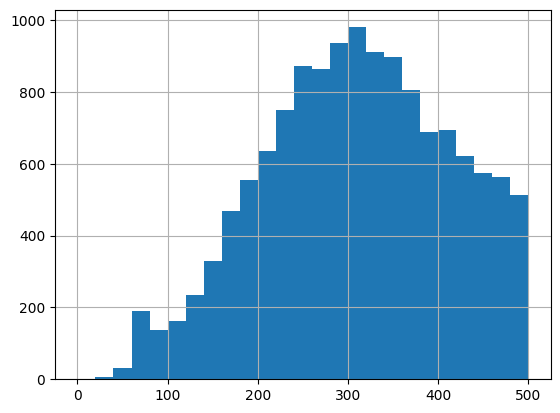

In [22]:
# The plot shows the distribution of the number of words in the text and summary columns.
graph_df['text'].hist(bins = 25, range=(0, 500))
plt.show()

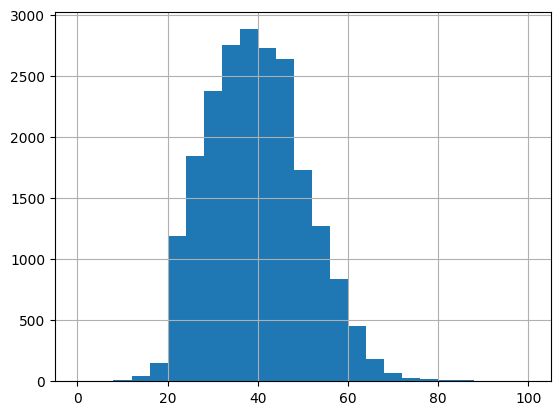

In [23]:
# The plot shows the distribution of the number of words in the text and summary columns.
graph_df['summary'].hist(bins = 25, range=(0, 100))
plt.show()

<Axes: >

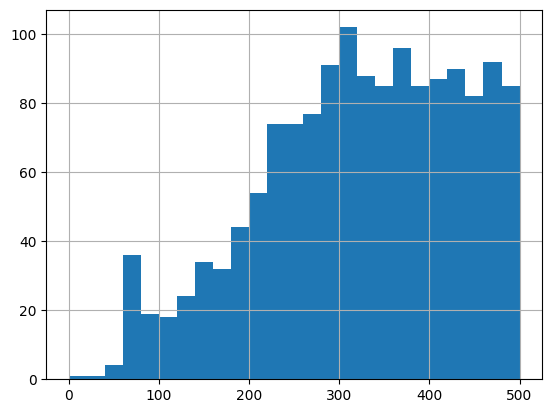

In [24]:
graph_df_test['text_test'].hist(bins = 25, range=(0, 500))

In [25]:
max_text_len = 500
max_summary_len = 60

In [26]:
cleaned_text = np.array(train['Text_Cleaned'])
cleaned_summary = np.array(train['Summary_Cleaned'])

short_text = []
short_summary = []
short_text_test = []

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split()) <= max_summary_len 
       and len(cleaned_summary[i].split()) > 1 
       and len(cleaned_text[i].split()) <= max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
    elif((len(cleaned_summary[i].split()) > max_summary_len) or (len(cleaned_text[i].split()) > max_text_len)):
        summ = cleaned_summary[i].split()
        txt = cleaned_text[i].split()
        if(len(summ)>max_summary_len):
          short_summary.append(' '.join(summ[:max_summary_len]))
        else:
          short_summary.append(cleaned_summary[i])
        if(len(txt)>max_text_len):
          short_text.append(' '.join(txt[:max_text_len]))
        else:
          short_text.append(cleaned_text[i]) 
  
for i in range(len(test)):
    if(len(test['Text_Cleaned'][i].split()) <= max_text_len):
        short_text_test.append(test['Text_Cleaned'][i])
    elif(len(test['Text_Cleaned'][i].split()) > max_text_len):
        txt = test['Text_Cleaned'][i].split()
        short_text_test.append(' '.join(txt[:max_text_len]))

post_pre = pd.DataFrame({'text':short_text,'summary':short_summary})
post_pre_test = pd.DataFrame({'text':short_text_test})

In [27]:
post_pre

,text,summary
0,केरल के एर्नाकुलम जिले में 5 साल की बच्ची से र...,kerala minor girl rape case - केरल के एर्नाकुल...
1,मानसून सीजन में हुई भारी बारिश ने कई राज्यों म...,इस साल मानसून सीजन में कई राज्यों में भारी तबा...
2,चुनावी साल में राजस्थान सरकार किसानों को लुभान...,चुनावी साल में राजस्थान सरकार किसानों को लुभान...
3,नॉन बैंकिग फाइनेंस कंपनी 'sbfc फाइनेंस लिमिटेड...,non-banking lender sbfc finance's initial publ...
4,स्वाद खाने की बुनियाद है। लेकिन अगर खाना सुंदर...,स्वाद खाने की बुनियाद है। लेकिन अगर खाना सुंदर...
...,...,...
21220,नई दिल्ली: कृषि मंत्री नरेंद्र सिंह तोमर ने एम...,"कृषि मंत्री ने कहा, तीनों कृषि कानूनों को वापस..."
21221,लखनऊ: उत्तर प्रदेश की योगी आदित्यनाथ सरकार ने ...,मुंबई में स्टेट गेस्ट हाउस अब यूपी स्टेट गेस्ट...
21222,नई दिल्ली। कोरोना वायरस को लेकर कुछ राहत की बा...,केंद्रीय स्वास्थ्य मंत्रालय की तरफ से शुक्रवार...
21223,नई दिल्ली: केंद्रीय शहरी विकास मंत्री हरदीप सि...,लोकसभा में इस शहर का प्रतिनिधित्व करने वाले प्...


In [28]:
post_pre_test

,text
0,‘वारिस पंजाब दे’ संगठन के चीफ अमृतपाल सिंह को ...
1,कांग्रेस नेता राहुल गांधी जल्द ही साउथ दिल्ली ...
2,संसद परिसर में मंगलवार को आम आदमी पार्टी (aap)...
3,राष्ट्रीय लोकतांत्रिक पार्टी (rlp) के प्रमुख औ...
4,मैं कश्मीर से हूं। बचपन में मुझे बताया गया कि ...
...,...
2995,कर्नाटक में एक महिला के खेत से 2 5 लाख रुपए के...
2996,सुप्रीम कोर्ट ने मंगलवार को भोपाल गैस पीड़ितों ...
2997,नीतू सिंह के पुराने इंटरव्यू की न्यूजपेपर क्लि...
2998,बीआर चोपड़ा की महाभारत में युधिष्ठिर का किरदार...


In [29]:
cleaned_summary = np.array(post_pre['summary'])
cleaned_text = np.array(post_pre['text'])
cleaned_text_test = np.array(post_pre_test['text'])
print("cleaned text's size ",cleaned_text.shape)
print("cleaned summary's size ",cleaned_summary.shape)
print("cleaned text test's size ",cleaned_text_test.shape)

cleaned text's size  (21225,)
cleaned summary's size  (21225,)
cleaned text test's size  (3000,)


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-04-25 14:23:17.871086: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 14:23:18.571472: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [31]:
#Tokenize text to get the vocab count
#prepare a tokenizer for training data
text_tokenizer = Tokenizer() 
text_tokenizer.fit_on_texts(list(cleaned_text))

#prepare a tokenizer for reviews on training data
summary_tokenizer = Tokenizer()   
summary_tokenizer.fit_on_texts(list(cleaned_summary))

text_tokenizer_test = Tokenizer()
text_tokenizer_test.fit_on_texts(list(cleaned_text_test))

In [32]:
vocab = text_tokenizer.word_index
import random
def sample_from_dict(d, sample=20):
    keys = random.sample(list(d), sample)
    values = [d[k] for k in keys]
    return dict(zip(keys, values))

print(sample_from_dict(vocab))

{'सेकंडों': 76372, '5m0zmxve': 41335, '‘स्वदेशी’': 119707, 'इशाक': 15733, "'पूरब": 87904, 'केमियो': 81464, 'मुसावी': 123176, 'हंसराज': 16957, 'जगराता': 89707, 'पहुंचेगी।05154': 109785, 'हत्यायूपी': 124238, "'क्रूरता": 134899, 'सांपला': 25459, 'है।रक्षा': 23765, 'मास्टर्स।': 89905, 'करेगी।इससे': 122407, 'शैली': 6435, 'गंवाए': 12612, 'पंचतत्वों': 76972, 'चलाया।पढ़ें': 124234}


In [33]:
cnt = 0
print("Vocab size: ", len(vocab))
print('Word with count:')
for k, v in text_tokenizer.word_counts.items():
    print(k, v)
    cnt += 1
    if cnt > 10:
        break

Vocab size:  140591
Word with count:
केरल 2027
के 330069
एर्नाकुलम 64
जिले 4153
में 264932
5 7523
साल 15263
की 200869
बच्ची 865
से 149510
रेप 448


In [34]:
thresh=5
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in text_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 73.56800933203405
Total Coverage of rare words: 1.8882393728575415


In [35]:
vocab = text_tokenizer_test.word_index
import random
def sample_from_dict(d, sample=20):
    keys = random.sample(list(d), sample)
    values = [d[k] for k in keys]
    return dict(zip(keys, values))

print(sample_from_dict(vocab))

{"'नेचुरल": 25359, '470': 10414, 'अभेद्यता': 31473, 'वाक्यांश': 17645, 'त्योहार।': 42488, 'इन्फ्लेशन': 18976, "'यकीनन": 42386, 'रैकी': 25843, 'शिजांग': 37795, 'थनबर्ग': 45317, 'हीथ्रो': 35261, 'संगकारा': 40053, '‘ब्लेड': 41822, 'जारी।': 27916, 'बचा': 1572, 'एफएमजी': 36955, 'मुर्दे': 39204, 'सोती': 40731, 'ब्लिकंन': 34543, '‘शर्मा': 32355}


In [36]:
cnt = 0
print("Vocab size: ", len(vocab))
print('Word with count:')
for k, v in text_tokenizer_test.word_counts.items():
    print(k, v)
    cnt += 1
    if cnt > 10:
        break

Vocab size:  45757
Word with count:
‘वारिस 4
पंजाब 733
दे’ 4
संगठन 225
के 46667
चीफ 212
अमृतपाल 194
सिंह 1496
को 22826
पुलिस 2037
ने 19374


In [37]:
# #prepare a tokenizer for reviews on training data
text_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
text_tokenizer.fit_on_texts(list(cleaned_text))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
text__seq    =   text_tokenizer.texts_to_sequences(cleaned_text)
#padding zero upto maximum length
cleaned_text    =   pad_sequences(text__seq,  maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
text_voc   =  text_tokenizer.num_words + 1

print("Size of vocabulary in text = {}".format(text_voc))

Size of vocabulary in text = 140581


In [38]:
thresh=5
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in summary_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 74.45752075894272
Total Coverage of rare words: 6.671634704952613


In [39]:
#prepare a tokenizer for reviews on training data
summary_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
summary_tokenizer.fit_on_texts(list(cleaned_summary))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
summary__seq    =   summary_tokenizer.texts_to_sequences(cleaned_summary)
#padding zero upto maximum length
cleaned_summary    =   pad_sequences(summary__seq,  maxlen=max_summary_len, padding='post')

#size of vocabulary ( +1 for padding token)
summary_voc   =  summary_tokenizer.num_words + 1

print("Size of vocabulary in summary = {}".format(summary_voc))

Size of vocabulary in summary = 12090


In [40]:
thresh2=5
cnt2=0
tot_cnt2=0
freq2=0
tot_freq2=0

for key,value in text_tokenizer_test.word_counts.items():
    tot_cnt2=tot_cnt2+1
    tot_freq2=tot_freq2+value
    if(value<thresh2):
        cnt2=cnt2+1
        freq2=freq2+value
    
print("% of rare words in vocabulary:",(cnt2/tot_cnt2)*100)
print("Total Coverage of rare words:",(freq2/tot_freq2)*100)

% of rare words in vocabulary: 68.96868238739428
Total Coverage of rare words: 4.092455136636798


In [41]:
# #prepare a tokenizer for reviews on training data
text_tokenizer_test = Tokenizer(num_words = tot_cnt2 - cnt2) 
text_tokenizer_test.fit_on_texts(list(cleaned_text_test))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
text__seq    =   text_tokenizer_test.texts_to_sequences(cleaned_text_test)
#padding zero upto maximum length
cleaned_text_test    =   pad_sequences(text__seq,  maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
text_voc   =  text_tokenizer_test.num_words + 1

print("Size of vocabulary in text = {}".format(text_voc))

Size of vocabulary in text = 14200
